In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [ ]:
df_share_race_city.share_hispanic.describe()
df_share_race_city.dtypes
df_share_race_city.replace(to_replace="(X)",value=0, inplace=True)
for column in df_share_race_city.columns[2:]:
  df_share_race_city[column] = pd.to_numeric(df_share_race_city[column])

df_share_race_city.dtypes

,0
Geographic area,object
City,object
share_white,float64
share_black,float64
share_native_american,float64
share_asian,float64
share_hispanic,float64


In [ ]:
data_frames = [df_hh_income,df_pct_poverty,df_pct_completed_hs,df_share_race_city,df_fatalities]
for df in data_frames:
  print(df.duplicated().sum())

0
0
0
0
0


In [ ]:
#Pocieszajace jest to ze w zadnej z tabeli nie ma zadnych duplikatow, jednakze w tabeli dotycvzacej przychodow oraz przypadkow smiertalnych wystepuja wartosci nienumeryczne

In [ ]:
df_fatalities.describe()

,id,age
count,"2,535.00","2,458.00"
mean,"1,445.73",36.61
std,794.26,13.03
min,3.00,6.00
25%,768.50,26.00
50%,"1,453.00",34.00
75%,"2,126.50",45.00
max,"2,822.00",91.00


In [ ]:
df_hh_income[df_hh_income["Median Income"].isna()].shape
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [ ]:
df_fatalities.isna().any()

,0
id,False
name,False
date,False
manner_of_death,False
armed,True
age,True
gender,False
race,True
city,False
state,False


In [ ]:
nan_columns = ["armed", "age","race","flee"]
for column in nan_columns:
    print(df_fatalities[df_fatalities[column].isna()].shape)

(9, 14)
(77, 14)
(195, 14)
(65, 14)


In [ ]:
for df in data_frames:
  print(df.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
df_fatalities[df_fatalities["armed"].isna()]


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,NaN,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,NaN,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,NaN,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,NaN,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,NaN,43.00,M,NaN,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,NaN,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [ ]:
df_fatalities[df_fatalities["age"].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [ ]:
df_fatalities[df_fatalities["flee"].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
857,1007,Ernesto Gamino,13/11/15,shot,undetermined,25.00,M,H,Jurupa Valley,CA,False,undetermined,NaN,False
874,1020,Randy Allen Smith,19/11/15,shot,gun,34.00,M,B,Manatee,FL,False,attack,NaN,False
898,1042,Zachary Grigsby,29/11/15,shot,gun,29.00,M,W,Lincoln,NE,False,attack,NaN,False
935,1083,Roy Carreon,12/12/15,shot,knife,49.00,M,H,San Bernardino,CA,False,attack,NaN,False
936,1086,Efrain Villanueva,12/12/15,shot,unknown weapon,NaN,M,NaN,Aurora,CO,False,attack,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2749,Carroll Tuttle,05/07/17,shot,gun,51.00,M,W,Madison,ME,False,attack,NaN,False
2468,2745,Dejuan Guillory,06/07/17,shot,undetermined,27.00,M,NaN,Mamou,LA,False,undetermined,NaN,False
2482,2767,Caleb Edward Blaylock,11/07/17,shot,knife,27.00,M,NaN,Las Vegas,NV,True,undetermined,NaN,True
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [ ]:
#Dla tabeli dotyczacej dochodow wystepuje 51 wartosci nienumerycznych

In [ ]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().values.any()

np.False_

In [ ]:
df_fatalities.fillna(0, inplace=True)
df_fatalities.duplicated().any()

np.False_

In [ ]:
df_pct_poverty.info()
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], downcast="float", errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.columns
# df_pct_poverty['Geographic Area'].nunique()
state_agg_pr_df = df_pct_poverty.groupby(by='Geographic Area', as_index=False).agg({'poverty_rate':pd.Series.mean})
state_agg_pr_df = state_agg_pr_df.sort_values(by="poverty_rate",ascending=False)
px.choropleth(state_agg_pr_df, locations='Geographic Area', locationmode="USA-states", color="poverty_rate", scope="usa")

In [ ]:
#Zdecydowanie wieksza wspolczynnik ubostwa wystepuje w stanach poludniuwych, w ktorych notuje on srednio wartosc 20%, najwyzsza wartosci wtystepuje Missisipi, gdzie wynosi on prawie 27%!
#Na wschodnim wybrzezu stanow wystepuja najnizse wartosci wspolczynnika, w pozosotalej czesci kraju jest to srednio kilkanascie procent

In [ ]:
px.bar(state_agg_pr_df, x='Geographic Area', y="poverty_rate")


In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], downcast="float", errors="coerce")
df_hs_agg = df_pct_completed_hs.groupby(by='Geographic Area', as_index=False).agg({'percent_completed_hs':pd.Series.mean})
px.choropleth(df_hs_agg, locations='Geographic Area', locationmode="USA-states", color='percent_completed_hs', scope="usa")

In [ ]:
df_hs_agg.sort_values(by="percent_completed_hs", ascending=False)
#Najwysze wspolczynniki skonczenia szkol srednich notuja stany polnocne, w stanach poludniowych wartosci wspolczynnika sa zauwazalnie nizsze, najnijsza wartosc wystepuje w Teksasie
# Najwyszsza w Massachuests i Wyoming

,Geographic Area,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59
21,ME,91.43
31,NJ,90.85
30,NH,90.71
34,NY,90.61
26,MT,90.49


In [ ]:
hs_pcp_df = pd.merge(df_hs_agg, state_agg_pr_df, on='Geographic Area')
hs_pcp_df =hs_pcp_df.sort_values(by="poverty_rate", ascending= False)


In [ ]:
high_school_vs_poverty_df = df_hs_agg.merge(state_agg_pr_df,on='Geographic Area')
high_school_vs_poverty_df

,Geographic Area,percent_completed_hs,poverty_rate
0,AK,84.63,19.85
1,AL,80.30,20.65
2,AR,79.95,22.96
3,AZ,80.47,25.67
4,CA,81.96,17.12
5,CO,90.11,13.36
6,CT,91.59,9.14
7,DC,89.30,18.00
8,DE,88.52,12.56
9,FL,85.74,17.57


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Line( x=hs_pcp_df['Geographic Area'], y=hs_pcp_df["percent_completed_hs"], name="Highschool completed ratio"),
    secondary_y=False,
)

fig.add_trace(
    go.Line( x=hs_pcp_df['Geographic Area'], y=hs_pcp_df["poverty_rate"], name="Poverty ratio"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Highschool complete vs poverty"
)

# Set x-axis title
fig.update_xaxes(title_text="US State")

# Set y-axes titles
fig.update_yaxes(title_text="Highschool completed ratio", secondary_y=False)
fig.update_yaxes(title_text="Poverty ratio", secondary_y=True)

fig.show()

/usr/local/lib/python3.12/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#Zaleznosc miedzy ukonczeniem szkoly sredniej, a wspolczynnikiem nedzy jest odwrotna - stany  ktorych poziom ubosta jest nizszy notuja wyraznie wiecej ukonczen szkol srednich

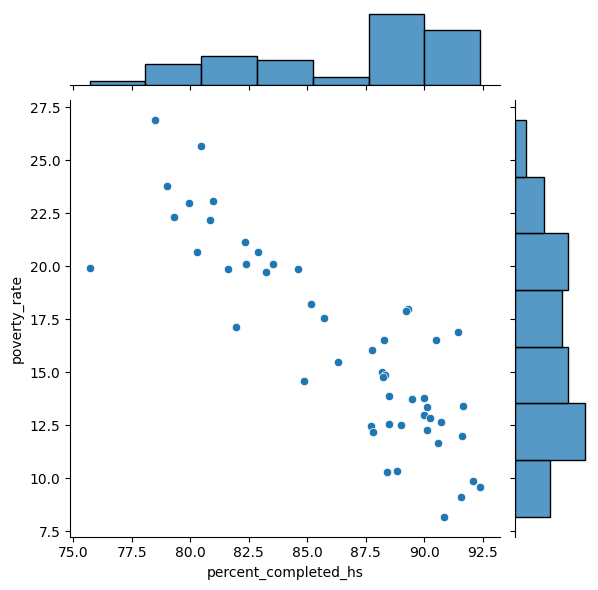

In [ ]:
sns.jointplot(data=hs_pcp_df, x="percent_completed_hs", y="poverty_rate", kind= "scatter")
#Joint plot polega na tym ze kazdej obserawecji z tabeli odpowiada np. w przypadku wykresu kropkowego odpowiednia kropka, z ktora jest usytuowana tak aby dane na poziomie obu osi odpowiadaly jej wartoscia

In [ ]:
#Rozklad wartosci w przypadku wspolczynnika ukonczenia szkoly sredniej ma nierownomierny charakter, najwiecej jest obserwacji z wartosciami z przedzialu 87,5 do 92,5%, pozostalych wartosci jest zauwazalnie mniej
#W przypadku wsplczynnika ubóstwa rozklad jesty znacznie baerdziej rowomierny, najczesciej wystepuja wartosci z przedzialu 10-12,5%. Im nizszy jest wpolczynnik ubóstwa tym wiekzy jest odestek ukonczenia szkol

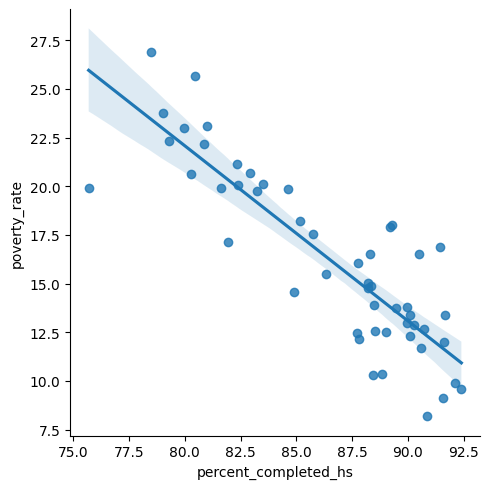

In [ ]:
sns.lmplot(data=hs_pcp_df, x="percent_completed_hs", y="poverty_rate")
#Wykres regresji liniowej pomiedzy wspolczynnikiem ubóstwa, a wspolczynnikiem ukonczenia szkol jest dosc dobrze dopasowany do rzeczywistosci -

In [ ]:
import matplotlib.pyplot as plt

race_columns = [
    'share_white',
    'share_black',
    'share_native_american',
    'share_asian',
    'share_hispanic'
]

# Agregacja do poziomu stanu
state_race_df = (
    df_share_race_city
    .groupby(by=['State'], as_index=False)[race_columns]
    .mean()
)
state_race_df
# )
race_cols = ['share_white', 'share_black', 'share_native_american', 'share_asian',
       'share_hispanic']

state_race_normalised = (
    state_race_df[race_cols]
    .div(state_race_df[race_cols].sum(axis=1), axis=0)
    * 100
)
state_race_normalised = state_race_normalised.merge(state_race_df[['State']], on=state_race_normalised.index)
state_race_normalised.drop(columns =['key_0'], inplace = True)
state_race_normalised = state_race_normalised.reindex(columns=['State','share_white', 'share_black', 'share_native_american', 'share_asian',
       'share_hispanic'])

state_race_normalised.set_index('State', inplace=True)
# Stacked bar chart
state_race_normalised.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8)
)

plt.title('Racial Makeup of US States (Average City Shares)')
plt.ylabel('Population Share')
plt.xlabel('State')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


,State,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [ ]:
pie_df = df_fatalities.groupby(by="race",as_index=False).size()

In [ ]:
fig = px.pie(pie_df, values="size", names="race",color="race", title="Race of victims")
fig.update_legends()
fig.show()

In [ ]:
#Co ciekawe blisko połowa ofiar stanowią osoby rasy białej, na następnym miejscu w tym tragicznym zestawieniu występują osoby czarnoskóre, dalej latynosi. 7,69% ofiar stanowią osoby z niesprecyzowaną rasą. marginalny jest udział Azjatów oraz Rdzennych Amerykanów

In [ ]:
bar_df = df_fatalities.groupby(by="gender",as_index=False).size()
px.bar(bar_df, x="gender", y="size", color="gender")

In [ ]:
#Zdecydowana wieksozsc ofiar smiertalnych stanowai mezczyzmo. kest tp [rzyt;aczakaca woelszpsc]

In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [ ]:
men_df = df_fatalities.query("gender == 'M'")
women_df = df_fatalities.query("gender != 'M'")
px.box(men_df, x="manner_of_death", y="age")
px.box(women_df, x="manner_of_death", y="age")

In [ ]:
df_fatalities = df_fatalities.query('age != 0')
fig = px.box(
    df_fatalities[df_fatalities["gender"].isin(["M", "F"])],
    x="manner_of_death",
    y="age",
    color="gender",
    points="outliers",
    title="Age Distribution by Manner of Death and Gender"
)
fig.update_yaxes(range = [0,92])
fig.show()

In [ ]:
#W przypadku mezczyzn wiek ofiar jeest znacznie znacznie bardziej rozciagniety - wartosci kwartyli sa podobne, jednakze w przypadku mezczyzn bedacych
#zastrzelonymi wysteupuje znaczna ilosc wartosci odstajacych, wiek ofiar poitrafia siegac nawet do 91 lat!! W przypadku ofiar postrzelonyuch i potraktowanych paralizatorem, rowniez wiekszy
#zakres wieku wystepuje w przypadku mezczyzn. W obu przypadkach kwartyle maja podobne zakresy, roznica miedzy plciami jest nieznacczan. Jednakze przedzial w przypadku mezczyzn sa znacznie bardziej rzociagnete dla
#osob postrzelonych i potraktowanych paralizatorem jest szerzszy niz u kobiet, najwyzszy wiek kobiet jest znacznie nizszy (o 15 lat roznicy miedzy plciami) w przypadku samych postrzelen, przedzial dal mezczyzn zaczyna sie jednak nizej niz u kobiet. W

In [ ]:
armed_vs_unarmed_df = df_fatalities.groupby(by="armed_bool", as_index=False).size()
px.pie(armed_vs_unarmed_df, values='size', names='armed_bool', title="Armed vs unarmed victims of fatal shootings")
weapons_df = df_fatalities.groupby(by="armed", as_index=False).size().rename({"size":"count"})
weapons_df = weapons_df.query("armed != 0")
px.pie(weapons_df, values="size", names="armed")

In [ ]:
df_fatalities.armed_bool.unique()
armed_summary = (
    df_fatalities
    .assign(armed_status=lambda x: x["armed_bool"].map({True: "Armed", False: "Unarmed"}))
    .groupby("armed_status")
    .size()
    .reset_index(name="count")
)

armed_summary["percentage"] = 100 * armed_summary["count"] / armed_summary["count"].sum()

# px.pie(
#     armed_summary,
#     values="percentage",
#     names="armed_status",
#     title="Percentage of Police Killings: Armed vs Unarmed"
# )
armed_summary

array(['Armed', 'Unarmed'], dtype=object)

In [ ]:
fig = px.histogram(df_fatalities, x="armed", title="Distribution of weapons carried by victims")
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
#Osoby zastrzelone przez policje najczesceij byly uzbrojone w pistolet - bylo ich

In [ ]:
df_fatalities.query("age <= 25 and age >0").count()
df_fatalities["armed"].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and

In [ ]:
df_fatalities.shape
533/2535 *100

21.025641025641026

In [ ]:
#533 ofiary były w młodsze lub w wieku 25 lat! Stanowią tym samym 21% wszystkich ofiar

In [ ]:
df_fatalities.query("age < 15 and age > 0")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,980,Jeremy Mardis,03/11/15,shot,unarmed,6.00,M,W,Marksville,LA,False,other,Car,True
1014,1165,Ciara Meyer,11/01/16,shot,unarmed,12.00,F,W,Penn Township,PA,False,other,Not fleeing,False
1585,1776,Jesse James Romero,09/08/16,shot,gun,14.00,M,H,Los Angeles,CA,False,attack,Foot,True
1678,1883,Tyre King,14/09/16,shot,toy weapon,13.00,M,B,Columbus,OH,False,other,Foot,False


In [ ]:

px.histogram(df_fatalities.query("age > 0 "), x="age", title = "Race distribution among victims")



In [ ]:
#Przewaznie ofiarami smiertelnymi postrzelen przez policje sa osoby w w wieku od 22-39 lat, a wiec osoby mlode lub w srednim wieku

In [ ]:
df_fatalities.query("age > 0").describe()
df_fatalities.query("age == 6")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,980,Jeremy Mardis,03/11/15,shot,unarmed,6.00,M,W,Marksville,LA,False,other,Car,True


In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2458 non-null   int64         
 1   name                     2458 non-null   object        
 2   date                     2458 non-null   datetime64[ns]
 3   manner_of_death          2458 non-null   object        
 4   armed                    2458 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2458 non-null   object        
 7   race                     2458 non-null   object        
 8   city                     2458 non-null   object        
 9   state                    2458 non-null   object        
 10  signs_of_mental_illness  2458 non-null   bool          
 11  threat_level             2458 non-null   object        
 12  flee                     2458 non-null 

([<matplotlib.axis.XTick at 0x7890ac6876e0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

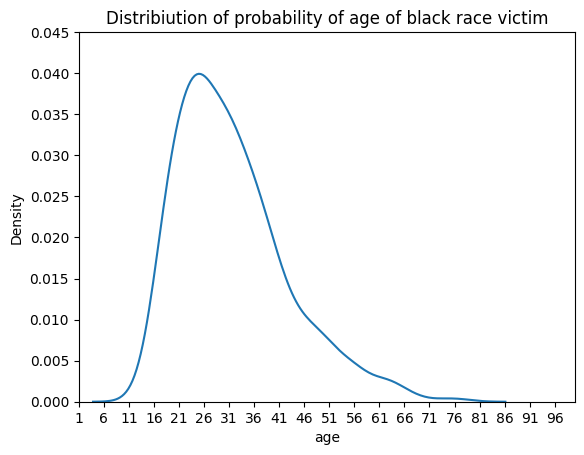

In [ ]:

# df_fatalities
# race_list = df_fatalities.race.unique()
# race_df = df_fatalities.groupby(by="race", as_index=False)
# # for race in race_list:
#   # print(df_fatalities.loc[(df_fatalities['race']==race))
sns.kdeplot(df_fatalities.loc[(df_fatalities['race']=="B"),"age"])
plt.title("Distribiution of probability of age of black race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))
# race_df["age"]

In [ ]:
#Rozklad prawdopododobinestwa wieku ofiar dla rasy czarnej wskazuje ze najczesciej te ofiary sa w wieku od 16-41 lat, prawpdoobienstwo jest najbardziej skoncentrowane w obregie tych wartosci

([<matplotlib.axis.XTick at 0x7890aec15d60>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

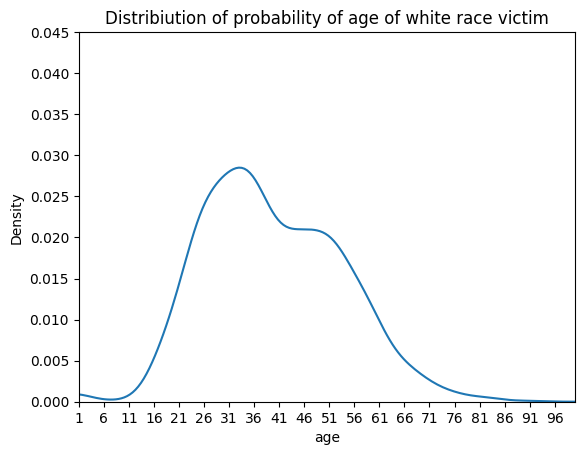

In [ ]:
sns.kdeplot(df_fatalities.loc[(df_fatalities['race']=="W"),"age"])
plt.title("Distribiution of probability of age of white race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))

In [ ]:
#Rozklad prawdopododobinestwa wieku ofiar dla rasy bialej jest znacznie bardziej rozciagniety, najwieksze prawdpodobienstwo wieku ofiar jest w obrebie 21-56 lat

([<matplotlib.axis.XTick at 0x7890aec89d60>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

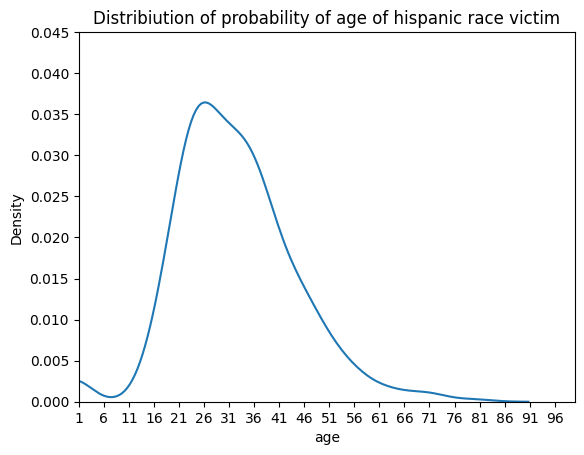

In [ ]:
sns.kdeplot(df_fatalities.loc[(df_fatalities['race']=='H'),"age"])
plt.title("Distribiution of probability of age of hispanic race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))

In [ ]:
# W przypadku ludnosci latynoskiej najwieiksze prawedopodibenstow jest skoncentrowane dla osob w wieku 21-41 lat, podobnie jak w przypadku ofiar rasy czarnej

([<matplotlib.axis.XTick at 0x7890aeb3b5c0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

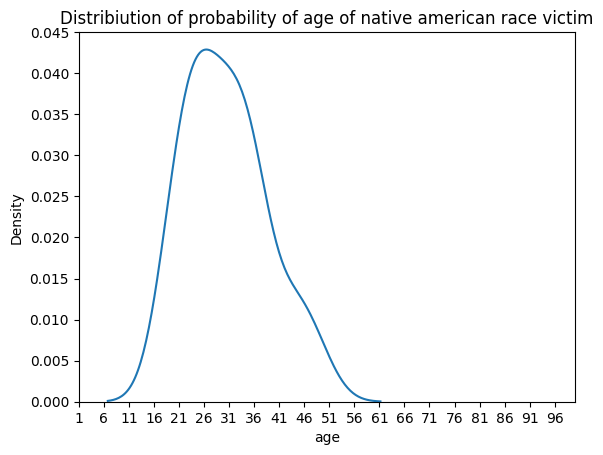

In [ ]:
sns.kdeplot(df_fatalities.loc[(df_fatalities["race"]== 'N'),"age"])
plt.title("Distribiution of probability of age of native american race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))

In [ ]:
#W przypadku rdzennych amrykanow najwieksze prawdopdoiobienstow zostania ofiar policyjnego postrzelneia jest dla osob w wieku 21-36 lat, wykres dla rdzennycgh amerykanow wyroznia sie tym ze jest znacznie wezszy i ostrzejszy od posotalcyh

([<matplotlib.axis.XTick at 0x7890aebd45f0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

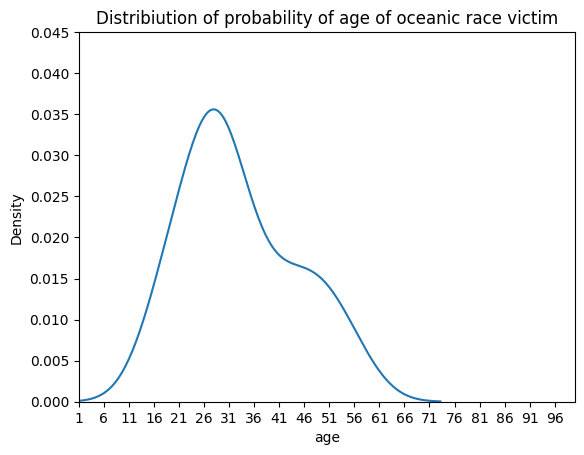

In [ ]:
sns.kdeplot(df_fatalities.loc[(df_fatalities["race"]== 'O'),"age"])
plt.title("Distribiution of probability of age of oceanic race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))

([<matplotlib.axis.XTick at 0x7890aea04ec0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

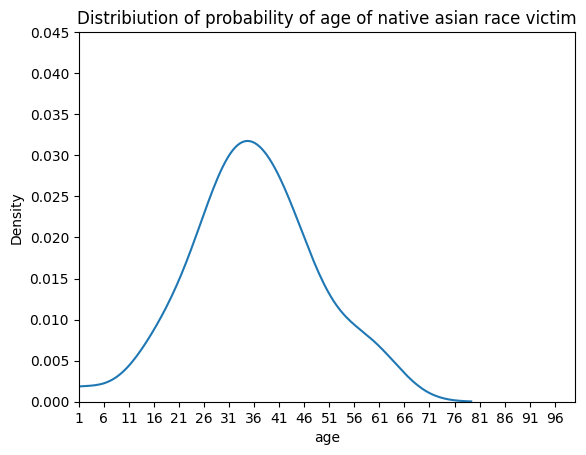

In [ ]:
sns.kdeplot(df_fatalities.loc[(df_fatalities["race"]== 'A'),"age"])
plt.title("Distribiution of probability of age of native asian race victim")
plt.ylim(0,0.045)
plt.xlim(6,100)
plt.xticks(range(1, 100,5))
#Dla osob pochodzacych z Oceani wykres jest bardziej rozciagniety, ofiarami policyjncyh postrzelen sa najczesciej osoby w wieku 21-51 lat

In [ ]:
#Dla osob pochodzenia azjatyckiego, ofiarami sa najczesciej osoby w wieku 21-51 lat

In [ ]:
#Porównując rozklad wieku ofiar miedzy poszczeglnymi rasami, mozna zauwayzyc ze to przeawznie mlode/ w srednim wieku osoby zostaja ofiarmai
#Jedynym wyjatkiem jest rasa biala, dla ktorej przedzial najbardziej prawdopodobnego wieku dla ofiary jest szerszy i dotyczy takze osob w wieku emerytalnym

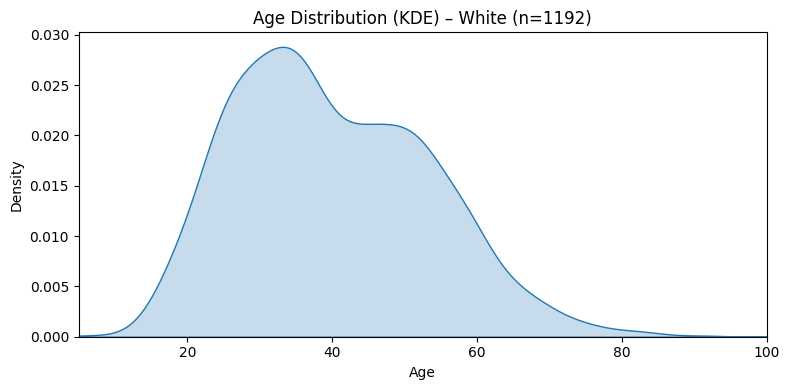

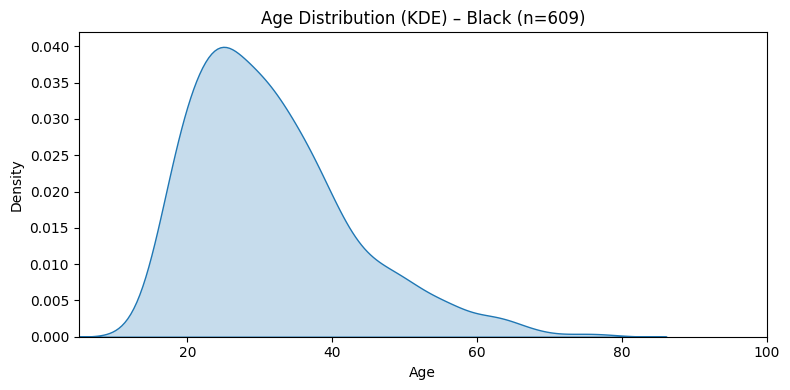

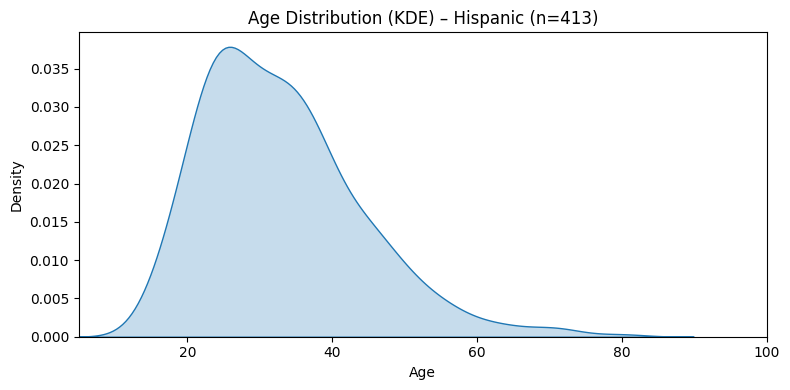

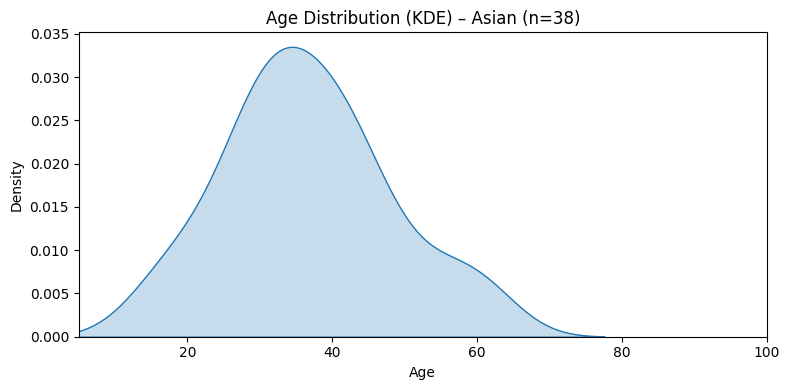

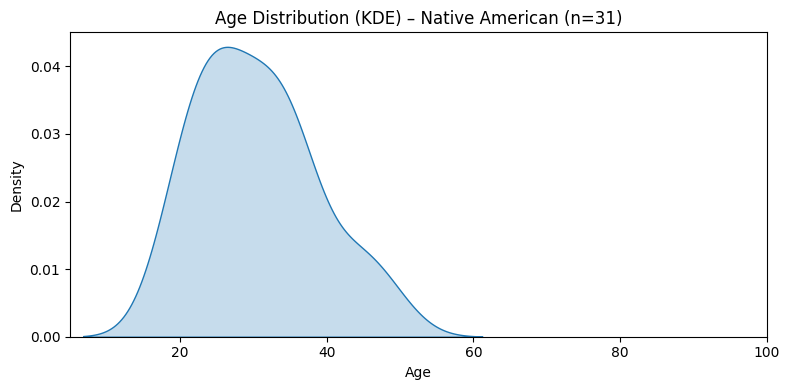

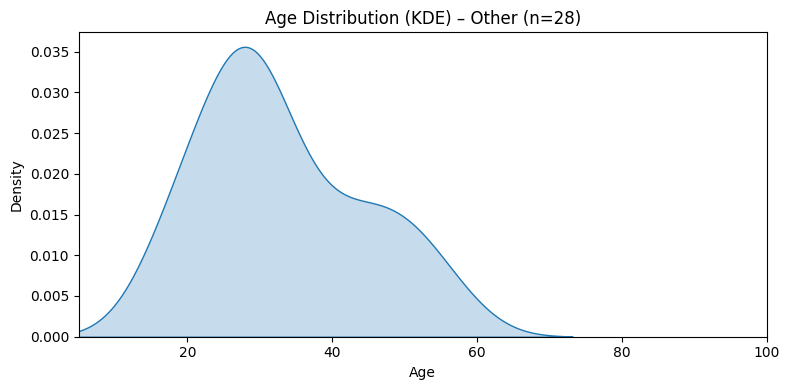

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

race_map = {
    "W": "White",
    "B": "Black",
    "H": "Hispanic",
    "A": "Asian",
    "N": "Native American",
    "O": "Other"
}

common_xlim = (5, 100)

for race_code, race_name in race_map.items():
    data = df_fatalities.loc[
        (df_fatalities["race"] == race_code) &
        (df_fatalities["age"].notna()),
        "age"
    ]

    if len(data) < 20:
        continue  # zbyt mała próba do sensownego KDE

    plt.figure(figsize=(8, 4))
    sns.kdeplot(data, fill=True)

    plt.title(f"Age Distribution (KDE) – {race_name} (n={len(data)})")
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.xlim(common_xlim)
    plt.tight_layout()
    plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
df_fatalities["armed_bool"]  = ["Unarmed" if x == "unarmed" else "Armed" for x in df_fatalities["armed"]]

grouped_df = df_fatalities.groupby(by=["race","armed_bool"], as_index= False).size().sort_values(by="size", ascending=False)
px.bar(grouped_df, x="race", y="size", color="armed_bool",hover_data="size")

In [ ]:
df_fatalities["armed_bool"]  = ["Unarmed" if x == "unarmed" else "Armed" for x in df_fatalities["armed"]]

grouped_df = df_fatalities.groupby(by=["race"], as_index= False).size().sort_values(by="size", ascending=False)
px.bar(grouped_df, x="race", y="size",color='race', title='Total number of killed people of each race')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df = df_fatalities["signs_of_mental_illness"].value_counts()
px.pie(df, values="count", names=df.index, title="Share of victims with mental illnesses")


In [ ]:
share_df = (
    df_fatalities['signs_of_mental_illness']
    .value_counts(normalize=True)
    .rename({True: "Mental illness", False: "No mental illness"})
    .reset_index()
)

share_df.columns = ["Mental health status", "share"]

px.pie(
    share_df,
    values="share",
    names="Mental health status",
    title="Share of Police Killing Victims with Diagnosed Mental Illness"
)


In [ ]:
#Udzial chorych psychicznie jest istotny - stanowią oni 25% wszystkich ofiar, jednakze zdecydowana wiekszosc zabojstw dotyczy
#Osob zdrowych psychicznie

In [ ]:
city_df = df_fatalities.groupby(by=["state","city","race"], as_index=False).size().sort_values(by="size", ascending=False)[:10]
px.bar(city_df, x="city", y="size", color="race", barmode="group",title="Top 10 cities with most fatal shootings")
# city_df.groupby(by="state").size()

In [ ]:
city_df = df_fatalities.groupby(by=["state","city"], as_index=False).size().sort_values(by="size", ascending=False)[:10]
px.bar(city_df, x="city", y="size", barmode="group",title="Top 10 cities with most fatal shootings")
# city_df.groupby(by="state").size()

In [ ]:
cities = list(city_df.city.unique())
cities

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Miami',
 'Columbus',
 'Austin',
 'St. Louis']

In [ ]:
df_share_race_city.rename(columns={'Geographic area':"State"}, inplace=True)
df_share_race_city.State.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [ ]:
states_shootings_df = df_fatalities.groupby(by="state", as_index=False).size()
px.choropleth(states_shootings_df, locations='state', locationmode="USA-states", color='size', scope="usa")

In [ ]:
top_10_cities = (
    df_fatalities
    .groupby("city", as_index=False)
    .size()
    .nlargest(10, "size")
    .rename(columns={"city": "City", "size": "total_fatalities"})
)
top_10_cities

,City,total_fatalities
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
60,Austin,18
808,Miami,18
1217,St. Louis,15


In [ ]:
fatal_by_race = (
    df_fatalities
    .merge(top_10_cities[["City"]], left_on="city", right_on="City")
    .groupby(["City", "race"], as_index=False)
    .size()
    .rename(columns={"size": "fatalities_by_race"})
)
fatal_by_race

,City,race,fatalities_by_race
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,0,1
4,Chicago,B,21
5,Chicago,H,1
6,Chicago,W,2
7,Columbus,0,1
8,Columbus,B,11
9,Columbus,O,1


In [ ]:
# population_by_race = (
#     df_share_race_city
#     .merge(top_10_cities[["City"]], on="City")
#     .rename(columns={"population": "population_by_race"})
# )
# population_by_race

In [ ]:
final_df = (
    fatal_by_race
    .merge(top_10_cities, on=["City"], how="left")
)
final_df



,City,race,fatalities_by_race,total_fatalities
0,Austin,B,3,18
1,Austin,H,2,18
2,Austin,W,13,18
3,Chicago,0,1,25
4,Chicago,B,21,25
5,Chicago,H,1,25
6,Chicago,W,2,25
7,Columbus,0,1,19
8,Columbus,B,11,19
9,Columbus,O,1,19


In [ ]:
final_df["rate"] = (
    final_df["fatalities_by_race"] / final_df["total_fatalities"]
)
final_df.sort_values(by="rate",ascending=False)

,City,race,fatalities_by_race,total_fatalities,rate
4,Chicago,B,21,25,0.84
40,St. Louis,B,11,15,0.73
2,Austin,W,13,18,0.72
37,San Antonio,H,12,20,0.60
8,Columbus,B,11,19,0.58
13,Houston,B,15,27,0.56
24,Los Angeles,H,19,39,0.49
27,Miami,B,8,18,0.44
20,Las Vegas,W,9,21,0.43
34,Phoenix,W,12,31,0.39


In [ ]:
# city_df
# cities = list(city_df.city.unique())
# states = list(city_df.state.unique())
# top_10_share_df = pd.DataFrame()
# for city in cities:
#   record = df_share_race_city.loc[df_share_race_city["City"] == f"{city} city"]
#   top_10_share_df = pd.concat([top_10_share_df,record],ignore_index=True)
# filter = top_10_share_df.State.isin(states)
# top_10_share_df = top_10_share_df[filter]
# top_10_share_df
# top_10_share_df.drop(index=[6,11,14,16,26], inplace=True)
# city_df.rename(columns={'city':'City'}, inplace=True)
# city_df["City"] = [(city + " " + "city") for city in city_df["City"]]
# city_df
# merged_df = pd.merge(top_10_share_df, city_df, how='inner', on='City')
# # merged_df.drop(columns=['State_y'], inplace=True)
# merged_df.rename(columns={"size":"fatal_shootings_count"}, inplace=True)
# filter = df_fatalities["city"].isin(cities)
# top_10_cities  = df_fatalities[filter]
# top_10_cities.rename(columns={'city':'City'}, inplace=True)
# top_10_cities = top_10_cities.groupby(by=["City","race"], as_index=False).size()
# # merged_df = pd.merge(top_10_share_df, city_df, how='inner', on='City')
# top_10_cities['City'] = [(city + " " + "city") for city in top_10_cities['City']]
# new_df = pd.merge(city_df, top_10_cities, how='inner', on='City')
# new_df['rate'] = new_df['size_y'] / new_df['size_x']
# new_df = new_df.sort_values(by="rate",ascending=False)
# px.bar(new_df, x='City', y='rate',color='race',title='Race share of fatal shootings among cities with most fatal shootings')
# 1. Top 10 cities by number of fatal shootings
# top_10_cities = (
#     df_fatalities
#     .groupby("city", as_index=False)
#     .size()
#     .nlargest(10, "size")
#     .rename(columns={"city": "City", "size": "total_fatalities"})
# )

# # 2. Fatal shootings by race in top 10 cities
# fatal_by_race = (
#     df_fatalities
#     .merge(top_10_cities[["City"]], left_on="city", right_on="City")
#     .groupby(["City", "race"], as_index=False)
#     .size()
#     .rename(columns={"size": "fatalities_by_race"})
# )

# 3. Population share by race in those cities
# population_by_race = (
#     df_share_race_city
#     .merge(top_10_cities[["City"]], on="City")
#     .rename(columns={"population": "population_by_race"})
# )

# 4. Merge & rate calculation
# final_df = (
#     fatal_by_race
#     .merge(population_by_race, on=["City", "race"], how="left")
# )

# final_df["rate"] = (
#     final_df["fatalities_by_race"] / final_df["population_by_race"]
# )

# # 5. Visualization
# px.bar(
#     final_df.sort_values("rate", ascending=False),
#     x="City",
#     y="rate",
#     color="race",
#     title="Rate of Fatal Police Shootings by Race in Top 10 Cities"
# )


In [ ]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])

/tmp/ipython-input-4212182395.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df_fatalities["year"] = [x.year for x in df_fatalities["date"]]
# df_fatalities["period"] = df_fatalities["date"].dt.to_period("m")
yearly_df = df_fatalities.groupby(by=["year"],as_index=False).size()
yearly_df

,year,size
0,2015,991
1,2016,963
2,2017,581


In [ ]:
fig = px.line(yearly_df, x="year", y="count", title="Number of police killings over time")
fig.update_layout(yaxis_range=[0,1000])
fig.show()

In [ ]:
#Ciezko jednoznacznie ocenic, czy mamy doczynienia z trendme, nasz zbior danych ogranicza sie tylko i wylacznie do dwoch lat
#Jednakze biorac pod uwage tylko i wylacnzie te dane mozemy powiedziec ze liczba zabojstw spowodoawanych przez policje zmniejsza sie, w ciagu dwoch lat zmniejszyla sie o blisko polwoe!!

In [ ]:
# Agregacja danych
yearly_df = (
    df_fatalities
    .groupby(by=["year"], as_index=False)
    .size()
).sort_values("year")
yearly_df["pct_change"] = yearly_df["size"].pct_change() * 100
yearly_df["pct_change"].fillna(0, inpla)
yearly_df
# # Wizualizacja
# fig = px.line(
#     yearly_df,
#     x="year",
#     y="count",
#     title="Number of Police Killings Over Time",
#     markers=True
# )
# fig.show()


,year,size,pct_change
0,2015,980,NaN
1,2016,937,-4.39
2,2017,541,-42.26
